# 1. Phase d'idéation

Début de la phase d'idéation par une analyse exploratoire (EDA) du dataset.

Les points analysés sont les suivants :
- Présence des valeurs manquantes
- Types de variables présentes

In [1]:
print("1. Aperçu du dataset")

import pandas as pd

# Chargement du dataset
df = pd.read_csv('data/train.csv')

# Aperçu du dataset
print(f"Shape : {df.shape}")
df.head()

1. Aperçu du dataset
Shape : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.1 Analyse des valeurs manquantes

Nous identifions les colonnes avec des valeurs manquantes pour préparer un futur traitement des données (imputation ou suppression).


In [2]:
print("1.1 Analyse des valeurs manquantes")

# Colonnes avec valeurs manquantes
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values.to_frame('Missing Values')

1.1 Analyse des valeurs manquantes


,Missing Values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


## 1.2 Types de variables

Nous comptons le nombre de variables de type numérique (`int`, `float`) et catégoriel (`object`).

In [3]:
print("1.2 Types de variables")

df.dtypes.value_counts()

1.2 Types de variables


object     43
int64      35
float64     3
Name: count, dtype: int64

---

# 2. Analyse de la distribution de la cible `SalePrice`

La variable cible `SalePrice` est la valeur que nous voulons prédire.
Analysons sa distribution pour comprendre sa répartition, la présence de skewness (asymétrie) ou d'outliers éventuels.


2. Analyse de la distribution de SalePrice


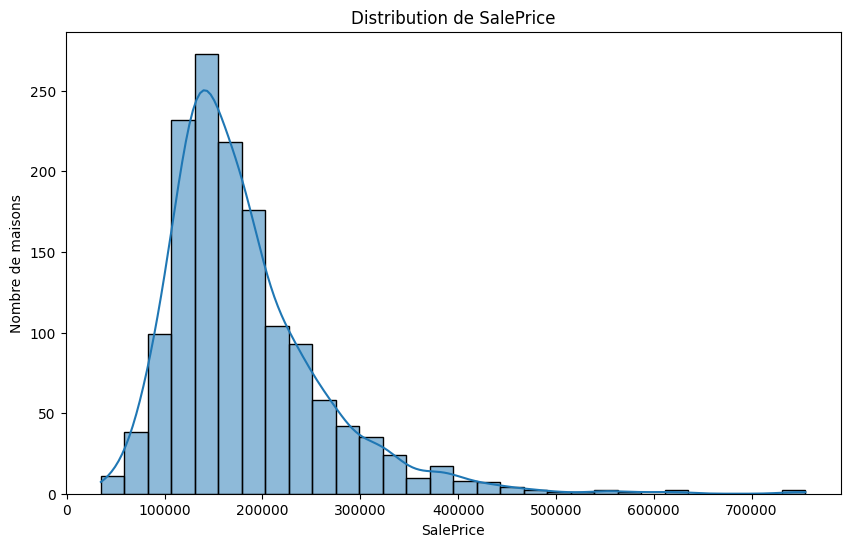

In [4]:
print("2. Analyse de la distribution de SalePrice")

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de SalePrice
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Nombre de maisons')
plt.show()

## 2.1 Observations sur `SalePrice`


L’analyse de la distribution de la variable cible SalePrice, qui représente le prix de vente final des maisons, révèle plusieurs éléments importants :

La distribution est asymétrique à droite (right-skewed), ce qui signifie que la majorité des maisons sont vendues à un prix relativement bas à modéré, tandis qu’un petit nombre de biens atteignent des prix très élevés. Ainsi, on remarque visuellement une longue « queue » sur la droite de l’histogramme. La plupart des transactions de vente se situent dans une plage de 100 000 € à 250 000 €, ce qui semble correspondre au cœur du marché résidentiel local. On peut observer un pic de vente autour de 150 000 €, ce qui pourrait correspondre à un prix standard (maisons de taille moyenne avec prestations classiques).

Par contre, on peut remarquer que certaines maisons sont vendues à plus de 500 000 €, voire plus de 700 000 €. Ces valeurs extrêmes, bien que rares, peuvent influencer négativement les modèles statistiques si elles ne sont pas traitées correctement. Ces outliers méritent donc une attention particulière en phase de modélisation.

Cette asymétrie est importante à considérer pour les modèles de machine learning, en particulier ceux qui supposent une distribution gaussienne (comme la régression linéaire, qui fonctionne mieux avec des résidus normalement distribués). Une transformation logarithmique de SalePrice (par exemple via log1p(SalePrice)) est souvent pratiquée pour réduire la skewness (asymétrie), car il faut éviter que le modèle soit trop influencé par les maisons très (trop ?) chères du dataset. 

Pour corriger cette asymétrie, on peut envisager de transformer les prix avec une fonction logarithmique, comme log(SalePrice). Pourquoi utiliser le logarithme ? Car il permet de réduire l’impact des maisons très chères (les très grands prix sont "compressés", ce qui équilibre un peu mieux la distribution), de stabiliser la variance (les différences de prix sont ramenées à des écarts relatifs plus homogènes), et d'améliorer les relations entre variables (les liens entre les caractéristiques (surface, qualité, etc.) et le prix sont souvent plus linéaires après transformation, ce qui aide le modèle à mieux apprendre). Il faudra y penser lors des prochaines étapes.


---

# 3. Corrélations principales avec SalePrice

Nous analysons ici les corrélations entre `SalePrice` et les autres variables numériques du dataset.
Cela permet d'identifier les facteurs les plus fortement liés au prix de vente d'une maison.


3. Analyse des corrélations avec SalePrice
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


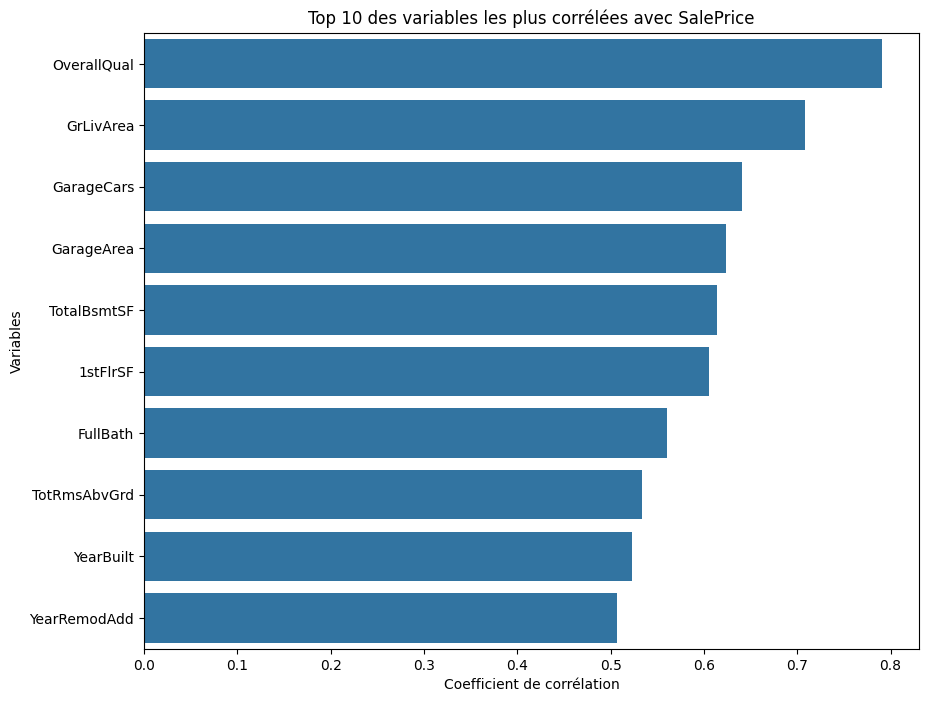

In [5]:
print("3. Analyse des corrélations avec SalePrice")

# Calcul des corrélations
corr_matrix = df.corr(numeric_only=True)

# Sélection des variables les plus corrélées avec SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)[1:11]

print(top_corr_features)

# Affichage graphique
plt.figure(figsize=(10,8))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title('Top 10 des variables les plus corrélées avec SalePrice')
plt.xlabel('Coefficient de corrélation')
plt.ylabel('Variables')
plt.show()

## 3.1 Observations sur les corrélations

OverallQual (qualité générale) est de loin la variable la plus corrélée au prix de vente. Elle reflète une évaluation globale de la maison par un professionnel ou un système de notation. Cela confirme que la perception qualitative de la maison impacte fortement sa valeur.

GrLivArea (surface habitable au-dessus du sol) suit de près. C’est intuitif : une plus grande surface utile entraîne généralement un prix plus élevé.

GarageCars et GarageArea traduisent la capacité de stationnement. Leur forte corrélation suggère que disposer d’un grand garage ajoute une valeur significative.

TotalBsmtSF et 1stFlrSF mesurent des surfaces importantes. Cela confirme que l’espace total disponible dans la maison est un facteur clé.

FullBath et TotRmsAbvGrd (nombre de salles de bains et de pièces) montrent qu’un plus grand nombre de commodités est aussi un indicateur de valeur.

YearBuilt et YearRemodAdd nous apprennent que l’ancienneté et la rénovation jouent un rôle important. Les maisons plus récentes ou récemment rénovées sont mieux valorisées.


---

# 4. Analyse des principales variables numériques

Nous visualisons la relation entre `SalePrice` et les principales variables numériques identifiées précédemment.
Cela permet de mieux comprendre leur impact et de détecter d’éventuelles non-linéarités.


4. Analyse des principales variables numériques


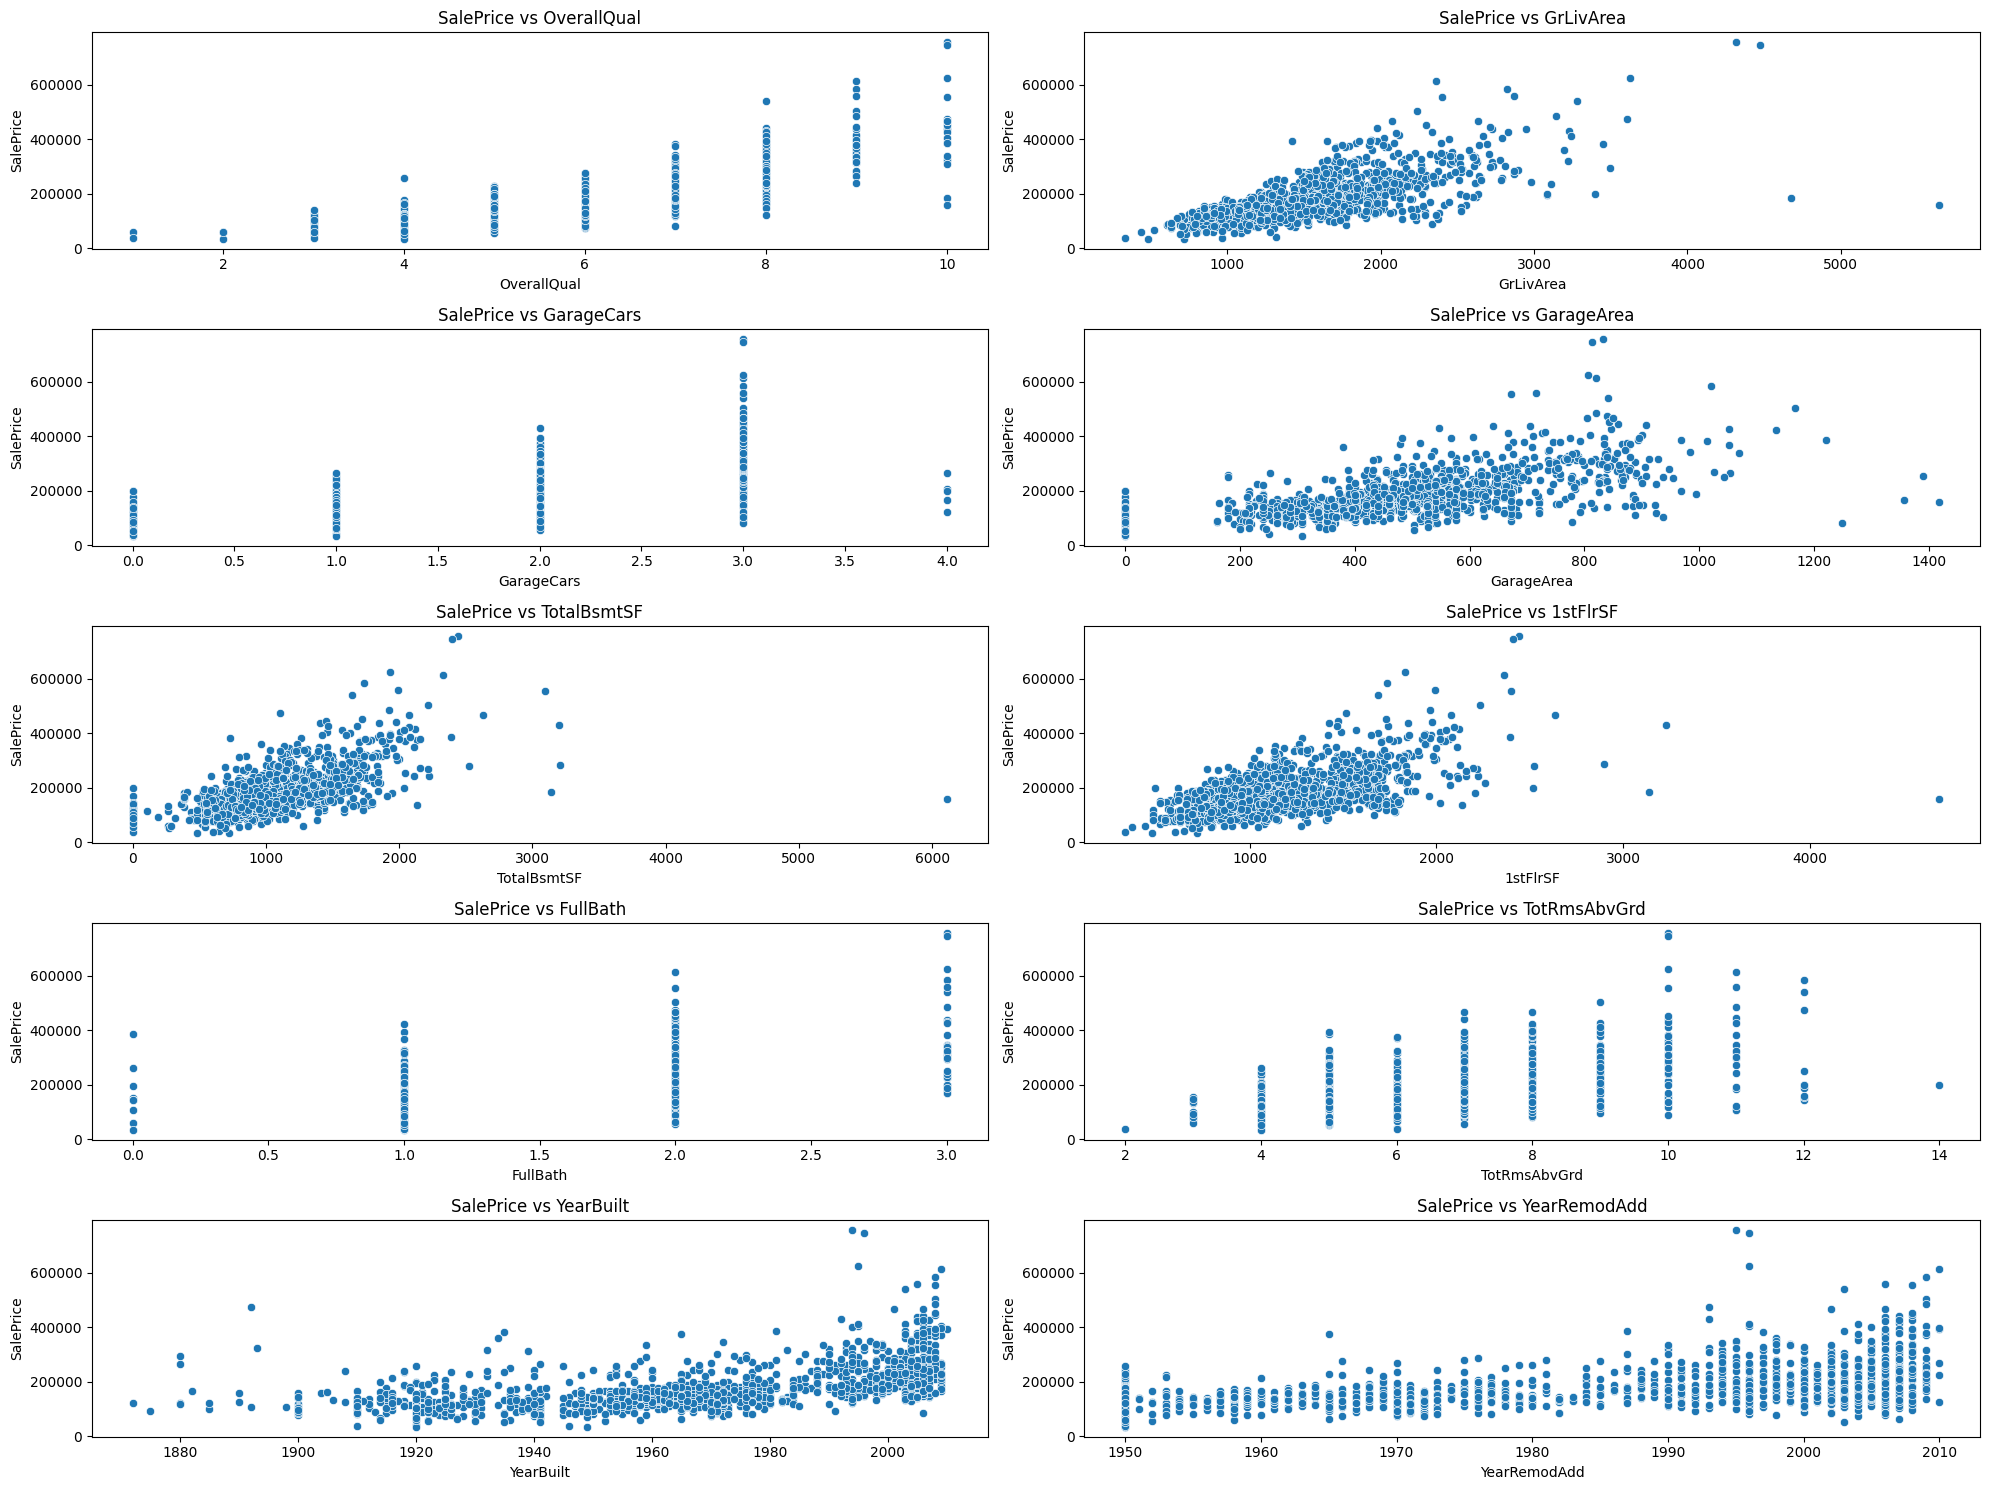

In [6]:
print("4. Analyse des principales variables numériques")

# Variables numériques les plus corrélées
num_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

# Scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, var in enumerate(num_vars):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(f'SalePrice vs {var}')
plt.tight_layout()
plt.show()

## 4.1 Observations sur les variables numériques

- La qualité globale (`OverallQual`) montre une forte relation quasi linéaire avec `SalePrice`.
- `GrLivArea` est positivement corrélée avec le prix, mais quelques outliers existent pour de très grandes surfaces.
- Les garages (`GarageCars`, `GarageArea`) influencent fortement également.
- Les surfaces du sous-sol et du rez-de-chaussée (`TotalBsmtSF`, `1stFlrSF`) suivent des tendances logiques.
- Les variables temporelles (`YearBuilt`, `YearRemodAdd`) montrent que les maisons plus récentes ont tendance à se vendre plus cher.

➡️ Ces insights guideront la sélection des variables pour notre modèle baseline.


# 5. Analyse des principales variables catégorielles

Nous analysons les variables catégorielles les plus prometteuses en fonction de leur relation avec `SalePrice`.
Les variables sélectionnées sont issues de notre compréhension métier et de l'exploration initiale.

5. Analyse des principales variables catégorielles


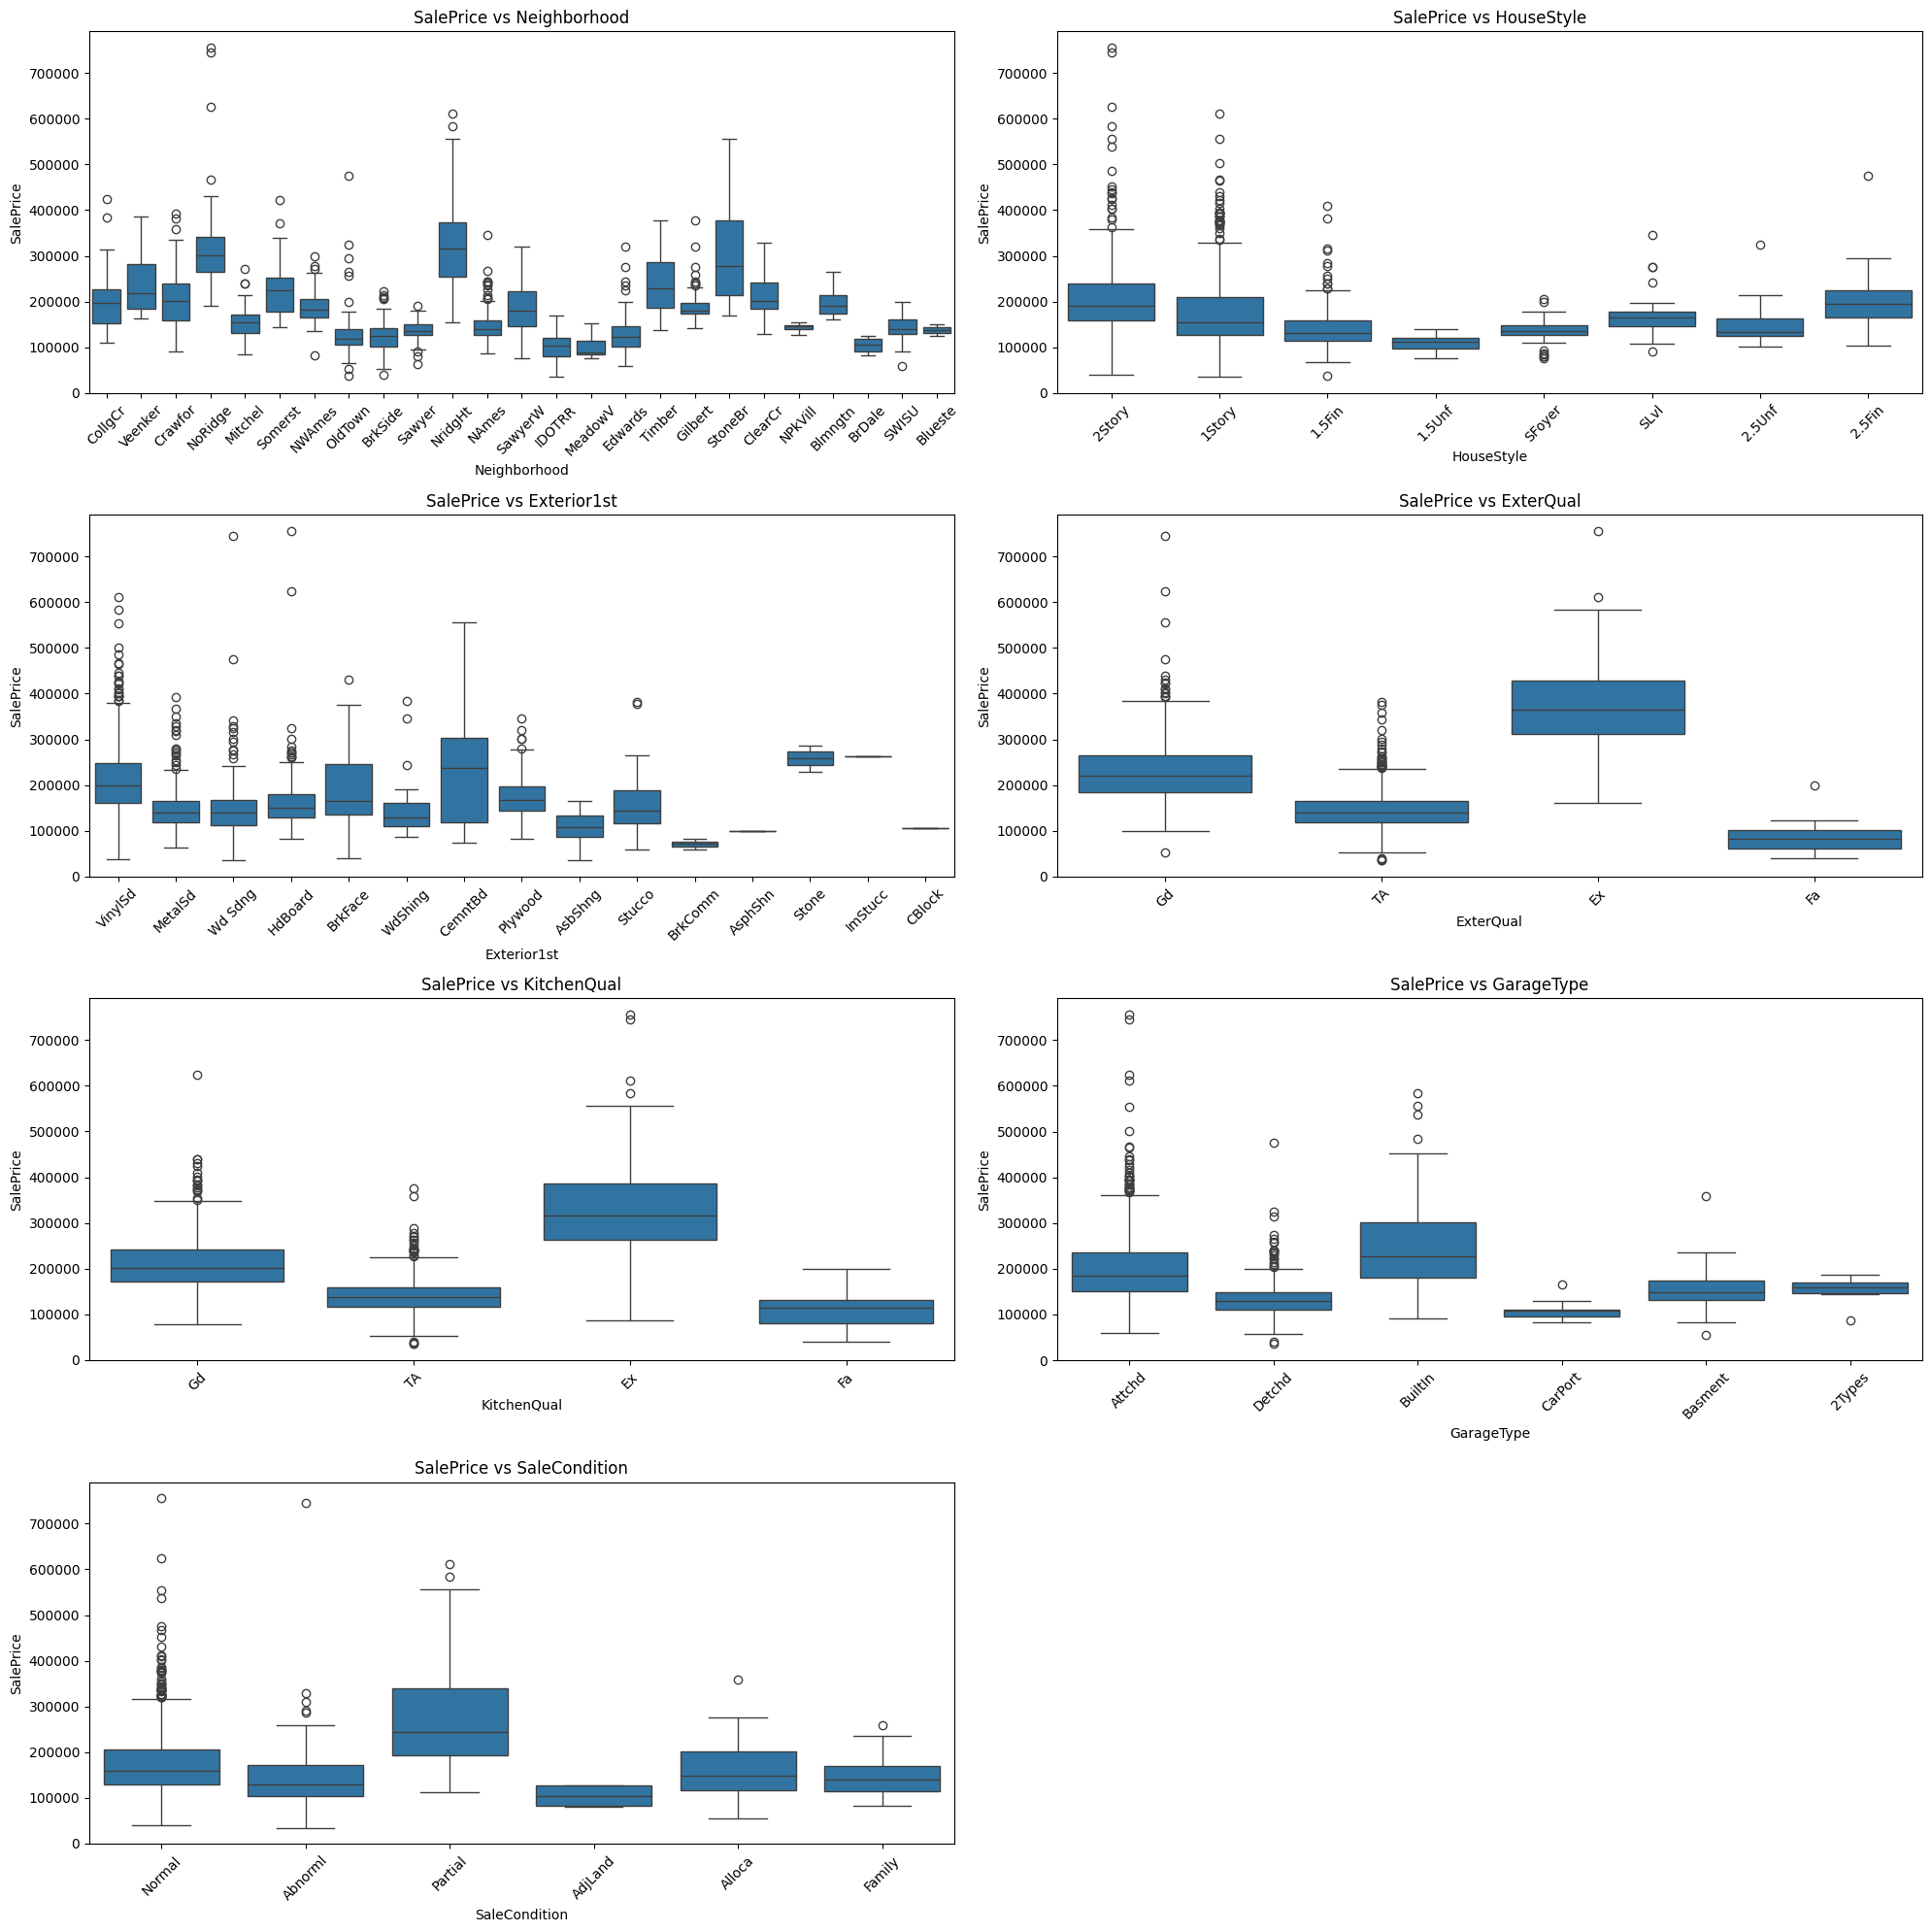

In [7]:
print("5. Analyse des principales variables catégorielles")

# Variables catégorielles sélectionnées
cat_vars = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'ExterQual', 'KitchenQual', 'GarageType', 'SaleCondition']

# Boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[var], y=df['SalePrice'])
    plt.title(f'SalePrice vs {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5.1 Observations sur les variables catégorielles

- `Neighborhood` a un impact majeur sur `SalePrice` : certains quartiers tirent fortement les prix vers le haut ou vers le bas.
- `ExterQual` et `KitchenQual` montrent que la qualité perçue extérieure et intérieure influence fortement la valeur d'une maison.
- `GarageType` et `SaleCondition` créent également des effets de groupe intéressants.

➡️ Certaines de ces variables devront être encodées proprement (ex : ordinal encoding pour KitchenQual).


# 6. Synthèse de la phase d'idéation

## Résumé de nos observations

### Distribution de SalePrice
- Asymétrique à droite (skewness positive).
- Présence d'outliers pour les maisons très chères.
- Transformation logarithmique envisagée pour stabiliser la variance.

### Variables numériques importantes
- **OverallQual** (qualité globale) est la variable la plus corrélée à `SalePrice`.
- **GrLivArea** (surface habitable hors sous-sol) suit également.
- **GarageCars**, **GarageArea**, **TotalBsmtSF**, **1stFlrSF**, **FullBath** sont des variables très pertinentes.
- **YearBuilt** et **YearRemodAdd** confirment l'importance de l'ancienneté.

### Variables catégorielles importantes
- **Neighborhood** influence fortement les prix selon le quartier.
- **ExterQual** et **KitchenQual** (qualité extérieure et cuisine) sont liées à des écarts marqués de prix.
- **GarageType** et **SaleCondition** produisent également des effets sur le prix.

## Conséquences pour le modèle baseline
- Sélection de quelques variables numériques et catégorielles pertinentes.
- Nécessité de traiter les variables manquantes et d'encoder les catégories.
- Possible besoin de transformer `SalePrice` en log pour de meilleures performances de modèle.
